#For this chapter, I will use the mnist dataset
#I will reduce the dataset dimensions to 2, using T-SNE

In [139]:
from sklearn.datasets import fetch_openml
mnist_ = fetch_openml(name="mnist_784", version='active')

In [140]:
X = mnist_["data"]


In [141]:
from sklearn.manifold import TSNE
import numpy as np

np.random.seed(42)

m = 2000
idx = np.random.permutation(60000)[:m]

X_subset = mnist_['data'][idx]

In [142]:
T_SNE = TSNE()

In [143]:
X_t_sne = T_SNE.fit_transform(X_subset)

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files


In [145]:
from sklearn.cluster import KMeans
K_means = KMeans(n_clusters=9)

In [146]:
K_means.fit(X_t_sne)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [147]:
K_means.cluster_centers_

array([[ 28.917057  , -18.265165  ],
       [-51.382427  ,  -0.19275379],
       [-10.722221  ,  38.867634  ],
       [ 32.00532   ,  34.37851   ],
       [  1.5444002 , -30.364918  ],
       [  5.994891  ,   5.65527   ],
       [ 60.966747  ,   6.1553497 ],
       [-21.573742  ,  15.848401  ],
       [-37.238026  , -28.917252  ]], dtype=float32)

In [148]:
K_means.cluster_centers_[1]

array([-51.382427  ,  -0.19275379], dtype=float32)

* Plotting clusters centroids

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


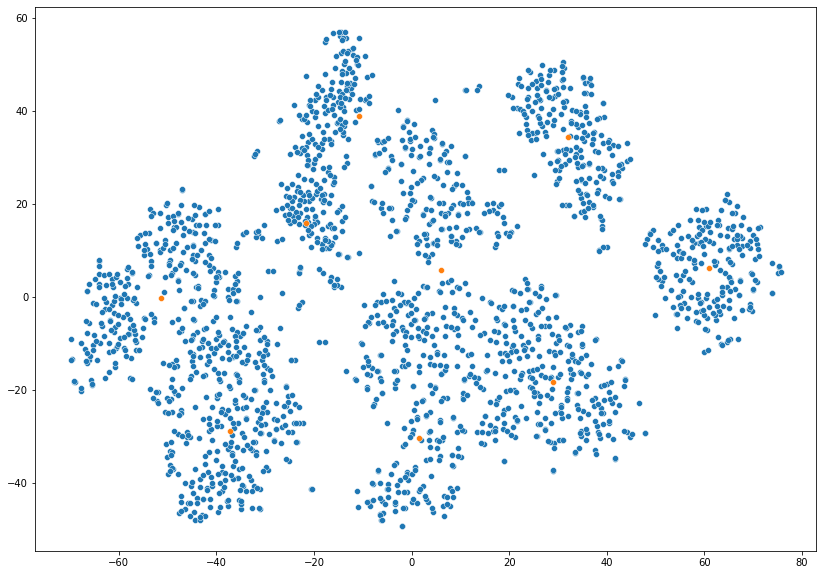

In [149]:
plt.figure(figsize=(14,10))

sns.scatterplot(X_t_sne[:,0], X_t_sne[:,1])
sns.scatterplot(K_means.cluster_centers_[:,0], K_means.cluster_centers_[:,1])

In [150]:
K_means.inertia_

306397.83422215283

* Let's Try Mini-Batch K-Means

In [151]:
from sklearn.cluster import MiniBatchKMeans
minibatch_means = MiniBatchKMeans(n_clusters=9)


In [152]:
minibatch_means.fit(X_t_sne)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=9, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [153]:
minibatch_means.cluster_centers_

array([[-23.079374 ,  17.44935  ],
       [ 30.558039 , -19.788279 ],
       [-35.960766 , -29.246351 ],
       [ 32.08468  ,  34.04874  ],
       [-51.444855 ,  -2.121495 ],
       [  1.3876779, -32.43623  ],
       [ 60.220135 ,   5.8146615],
       [  7.238923 ,   4.191116 ],
       [-10.887252 ,  39.576714 ]], dtype=float32)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


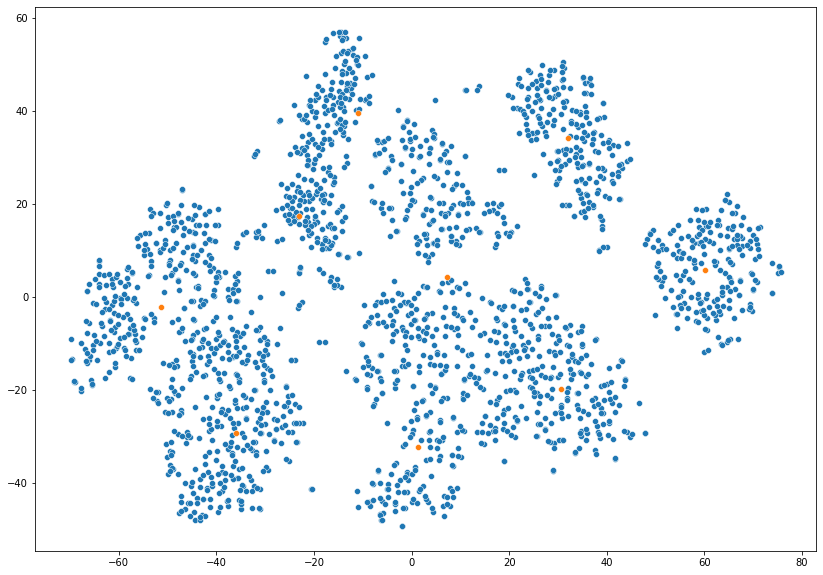

In [154]:
plt.figure(figsize=(14,10))

sns.scatterplot(X_t_sne[:,0], X_t_sne[:,1])
sns.scatterplot(minibatch_means.cluster_centers_[:,0], minibatch_means.cluster_centers_[:,1])

# Let's use K-means for image segmentation

In [155]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get("https://static.wikia.nocookie.net/monsterhunterespanol/images/9/91/MHWI-Icono_Alatreon.png/revision/latest/scale-to-width-down/80?cb=20200331101744&path-prefix=es")
img = Image.open(BytesIO(response.content))

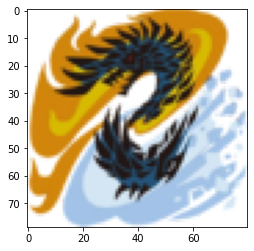

In [156]:
plt.imshow(img)


In [157]:
img_array = np.array(img)
img_array.shape

(79, 80, 4)

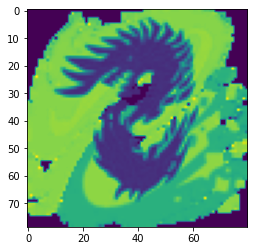

In [158]:
plt.imshow(img_array[:,:,0])

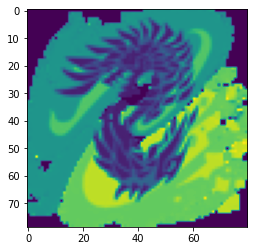

In [159]:
plt.imshow(img_array[:,:,1])

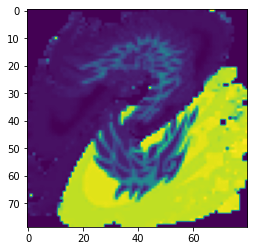

In [160]:
plt.imshow(img_array[:,:,2])

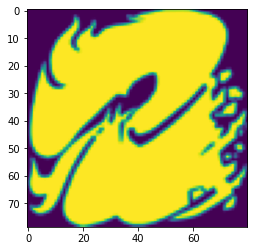

In [161]:
plt.imshow(img_array[:,:,3])

In [162]:
X = img_array.reshape(-1,4)

In [204]:
X.shape
k_means =KMeans(n_clusters=4).fit(X)

In [205]:
k_means.cluster_centers_

array([[202.38465975, 137.76182238,  11.65051903, 235.47462514],
       [ 70.        ,  46.21872541,   9.05979544,   6.35483871],
       [175.83815926, 203.00310238, 231.65615305, 188.36504654],
       [ 49.46777697,  49.72773353,  48.06082549, 251.80086894]])

In [206]:
k_means.cluster_centers_[k_means.labels_]

array([[70.        , 46.21872541,  9.05979544,  6.35483871],
       [70.        , 46.21872541,  9.05979544,  6.35483871],
       [70.        , 46.21872541,  9.05979544,  6.35483871],
       ...,
       [70.        , 46.21872541,  9.05979544,  6.35483871],
       [70.        , 46.21872541,  9.05979544,  6.35483871],
       [70.        , 46.21872541,  9.05979544,  6.35483871]])

In [207]:
segmented_img = k_means.cluster_centers_[k_means.labels_]

In [208]:
segmented_img = segmented_img.reshape(img_array.shape)

In [209]:
segmented_img

array([[[70.        , 46.21872541,  9.05979544,  6.35483871],
        [70.        , 46.21872541,  9.05979544,  6.35483871],
        [70.        , 46.21872541,  9.05979544,  6.35483871],
        ...,
        [70.        , 46.21872541,  9.05979544,  6.35483871],
        [70.        , 46.21872541,  9.05979544,  6.35483871],
        [70.        , 46.21872541,  9.05979544,  6.35483871]],

       [[70.        , 46.21872541,  9.05979544,  6.35483871],
        [70.        , 46.21872541,  9.05979544,  6.35483871],
        [70.        , 46.21872541,  9.05979544,  6.35483871],
        ...,
        [70.        , 46.21872541,  9.05979544,  6.35483871],
        [70.        , 46.21872541,  9.05979544,  6.35483871],
        [70.        , 46.21872541,  9.05979544,  6.35483871]],

       [[70.        , 46.21872541,  9.05979544,  6.35483871],
        [70.        , 46.21872541,  9.05979544,  6.35483871],
        [70.        , 46.21872541,  9.05979544,  6.35483871],
        ...,
        [70.        , 46.21

In [210]:
segmented_img.shape

(79, 80, 4)

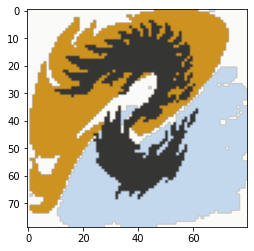

In [211]:
plt.imshow(np.uint8(segmented_img))